In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:

# Load the data from the uploaded file
file_path = '../results/sat_data.csv'
sat_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
sat_data.head()


,NORAD,Longitude,COSPAR,SATNAME,COUNTRY,LAUNCH,COMPLIANCE
0,38978,-177.041615,2012-061B,YAMAL 300K,CIS,11/2/12,Yes
1,33749,-176.935776,2009-008A,NSS 9,SES,2/12/09,Yes
2,39206,-176.462519,2013-036A,MUOS 2,US,7/19/13,No
3,39070,-174.252130,2013-004A,TDRS 11,US,1/31/13,Yes
4,51287,-164.612396,2021-118E,ASCENT,US,12/7/21,Yes


In [66]:
# Calculate the compliance percentage by country
compliance_by_country = sat_data.groupby('COUNTRY')['COMPLIANCE'].value_counts(normalize=True).unstack().fillna(0) * 100
compliance_by_country = compliance_by_country.rename(columns={'Yes': 'Compliant', 'No': 'Non-Compliant'})

# Display the compliance percentage by country
compliance_by_country.reset_index(inplace=True)

quantity_by_country = sat_data['COUNTRY'].value_counts().reset_index()
quantity_by_country.columns = ['COUNTRY', 'Total Satellites']

compliance_counts = sat_data.groupby(['COUNTRY', 'COMPLIANCE']).size().unstack(fill_value=0)
compliance_counts.columns = ['Non-Compliant', 'Compliant']

most_compliant = compliance_by_country.sort_values(by='Compliant', ascending=False).head(5)
least_compliant = compliance_by_country.sort_values(by='Compliant').head(5)


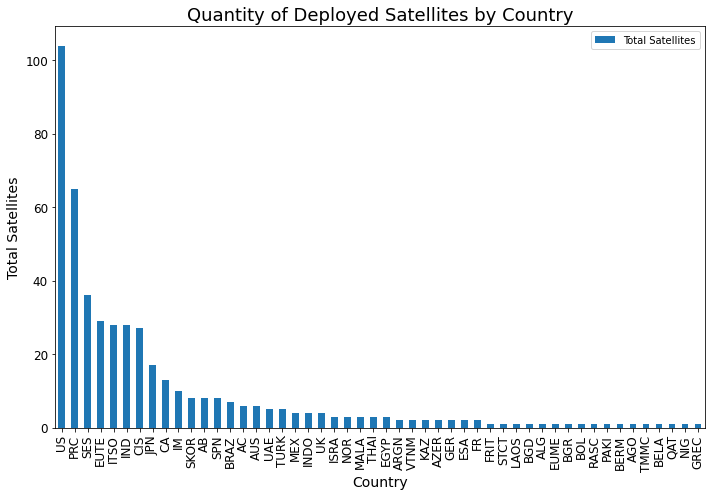

In [67]:
# Set a larger figure size for better readability
figsize = (10, 7)

# Quantity of deployed satellites by country
quantity_by_country.plot(kind='bar', x='COUNTRY', figsize=figsize)
plt.title('Quantity of Deployed Satellites by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Satellites', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/number_sat_per_country.png', dpi=400)
plt.show()


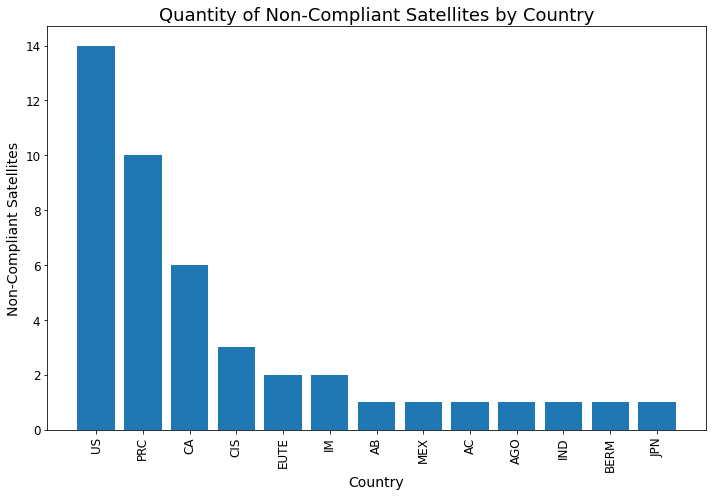

In [68]:
# Extract the quantity of non-compliant satellites per country
non_compliant_counts = sat_data[sat_data['COMPLIANCE'] == 'No']['COUNTRY'].value_counts().reset_index()
non_compliant_counts.columns = ['COUNTRY', 'Non-Compliant Satellites']

# Plot the quantity of non-compliant satellites in a bar graph
plt.figure(figsize=figsize)
plt.bar(non_compliant_counts['COUNTRY'], non_compliant_counts['Non-Compliant Satellites'])
plt.title('Quantity of Non-Compliant Satellites by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Non-Compliant Satellites', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/number_noncompliant_per_country.png', dpi=400)
plt.show()


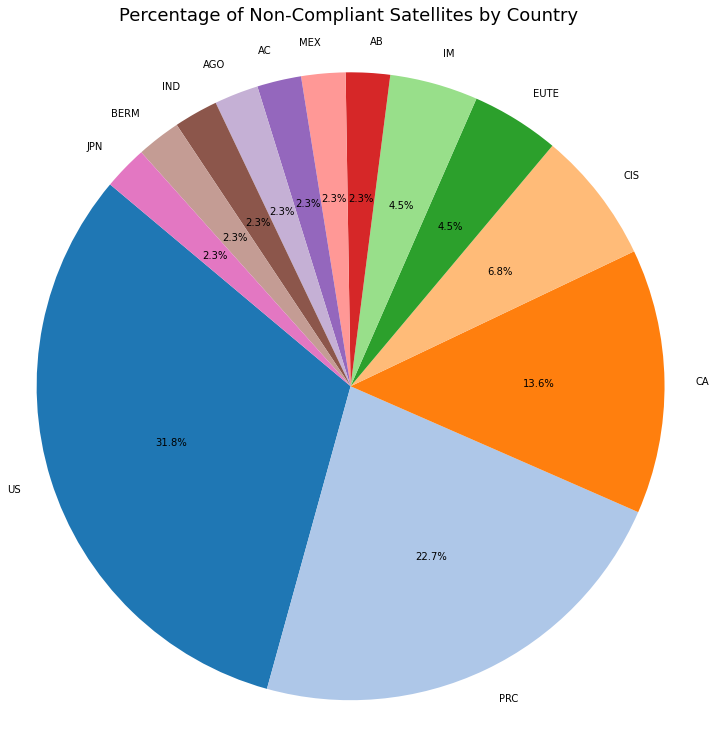

In [69]:
# Extract the quantity of non-compliant satellites per country
non_compliant_counts = sat_data[sat_data['COMPLIANCE'] == 'No']['COUNTRY'].value_counts()

# Plot the pie chart for non-compliant satellites by country
plt.figure(figsize=(10, 10.5))
plt.pie(non_compliant_counts, labels=non_compliant_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
# Customizations for better readability
plt.title('Percentage of Non-Compliant Satellites by Country', fontsize=18, pad=20)  # Add padding to separate title from pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.xticks(fontsize=12)  # Increase font size of xticks (if needed)
plt.yticks(fontsize=12)  # Increase font size of yticks (if needed)
plt.savefig('../figures/countries_noncompliance_percentage_piechart.png', dpi=400)
plt.show()


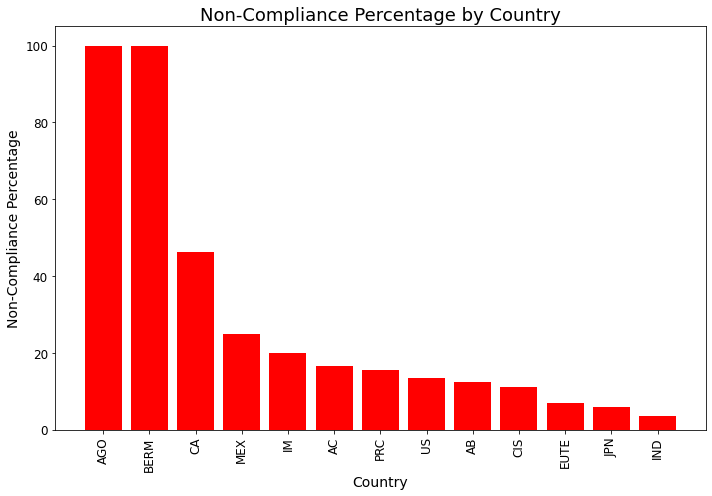

In [70]:
# Calculate the compliance percentage by country again to include necessary columns
compliance_by_country = sat_data.groupby('COUNTRY')['COMPLIANCE'].value_counts(normalize=True).unstack().fillna(0) * 100
compliance_by_country = compliance_by_country.rename(columns={'Yes': 'Compliant', 'No': 'Non-Compliant'})

# Filter out countries with 0% non-compliance
non_compliance_filtered = compliance_by_country[compliance_by_country['Non-Compliant'] > 0]

# Sort the remaining countries by non-compliance percentage
ranked_non_compliance = non_compliance_filtered.sort_values(by='Non-Compliant', ascending=False)

# Plot the non-compliance percentage in a bar graph
plt.figure(figsize=figsize)
plt.bar(ranked_non_compliance.index, ranked_non_compliance['Non-Compliant'], color='red')
plt.title('Non-Compliance Percentage by Country', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Non-Compliance Percentage', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('../figures/countries_noncompliance_percentage.png', dpi=400)
plt.show()


In [71]:

# Convert the launch date column to datetime format
sat_data['LAUNCH'] = pd.to_datetime(sat_data['LAUNCH'], format='%m/%d/%y')

# Extract the year from the launch date
sat_data['LAUNCH_YEAR'] = sat_data['LAUNCH'].dt.year

# Calculate the number of satellites launched each year
launches_per_year = sat_data['LAUNCH_YEAR'].value_counts().sort_index()

# Calculate the cumulative number of satellites launched each year
cumulative_launches = launches_per_year.cumsum()


# Filter compliant satellites
compliant_satellites = sat_data[sat_data['COMPLIANCE'] == 'Yes']
# Calculate the number of compliant satellites launched each year
compliant_per_year = compliant_satellites['LAUNCH_YEAR'].value_counts().sort_index()
# Calculate the cumulative number of compliant satellites each year
cumulative_compliant = compliant_per_year.cumsum()


# Filter non-compliant satellites
non_compliant_satellites = sat_data[sat_data['COMPLIANCE'] == 'No']
# Calculate the number of non-compliant satellites launched each year
non_compliant_per_year = non_compliant_satellites['LAUNCH_YEAR'].value_counts().sort_index()
# Calculate the cumulative number of non-compliant satellites each year
cumulative_non_compliant = non_compliant_per_year.cumsum()


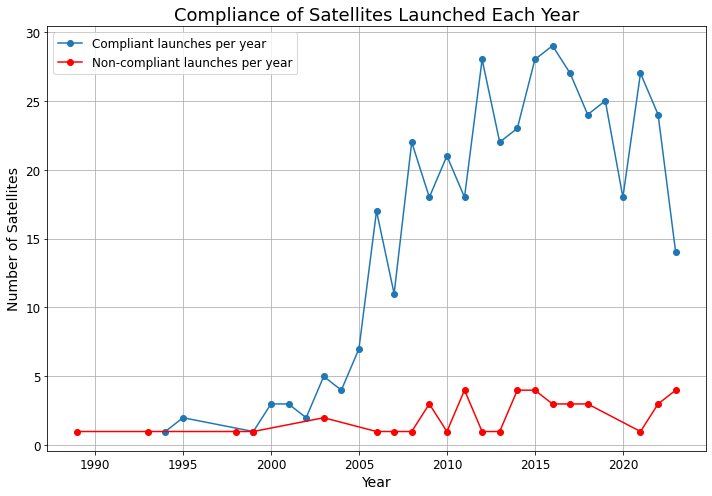

In [72]:

# Plot the number of satellites launched each year
plt.figure(figsize=figsize)
compliant_per_year.plot(kind='line', marker='o', label = 'Compliant launches per year')
non_compliant_per_year.plot(kind='line', marker='o', color = 'red', label = 'Non-compliant launches per year')
plt.title('Compliance of Satellites Launched Each Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Satellites', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/number_compliance_sat_over_time.png', dpi=400)
plt.show()



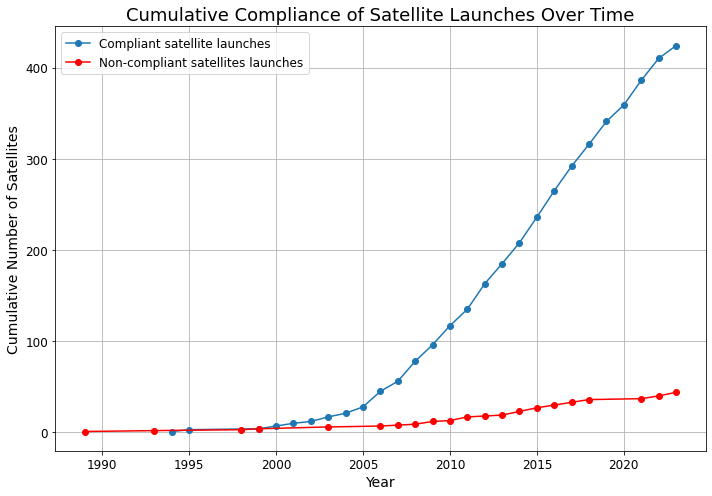

In [73]:

# Plot the cumulative number of satellites launched each year
plt.figure(figsize=figsize)
cumulative_compliant.plot(kind='line', marker='o', label = 'Compliant satellite launches')
cumulative_non_compliant.plot(kind='line', marker='o', color='red', label = 'Non-compliant satellites launches')
plt.title('Cumulative Compliance of Satellite Launches Over Time', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Number of Satellites', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/cumulative_compliance_sat_over_time.png', dpi=400)
plt.show()


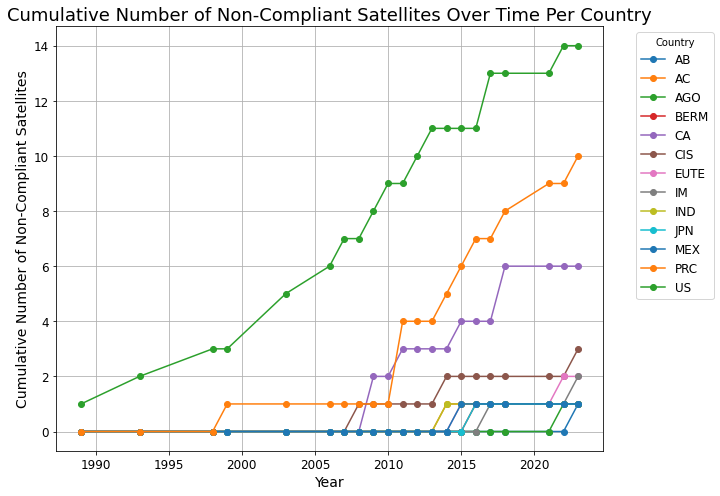

In [74]:
# Filter non-compliant satellites
non_compliant_satellites = sat_data[sat_data['COMPLIANCE'] == 'No']

# Group by country and year, then count the number of non-compliant satellites
non_compliant_per_country_year = non_compliant_satellites.groupby(['COUNTRY', 'LAUNCH_YEAR']).size().unstack(fill_value=0)

# Calculate the cumulative sum of non-compliant satellites for each country
cumulative_non_compliant_per_country = non_compliant_per_country_year.cumsum(axis=1)

# Plot the cumulative number of non-compliant satellites per country over time
plt.figure(figsize=figsize)
for country in cumulative_non_compliant_per_country.index:
    plt.plot(cumulative_non_compliant_per_country.columns, cumulative_non_compliant_per_country.loc[country], marker='o', label=country)

plt.title('Cumulative Number of Non-Compliant Satellites Over Time Per Country', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative Number of Non-Compliant Satellites', fontsize=14)
plt.legend(title='Country', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/cumulative_noncompliant_sat_over_time_per_country.png', dpi=400)
plt.show()


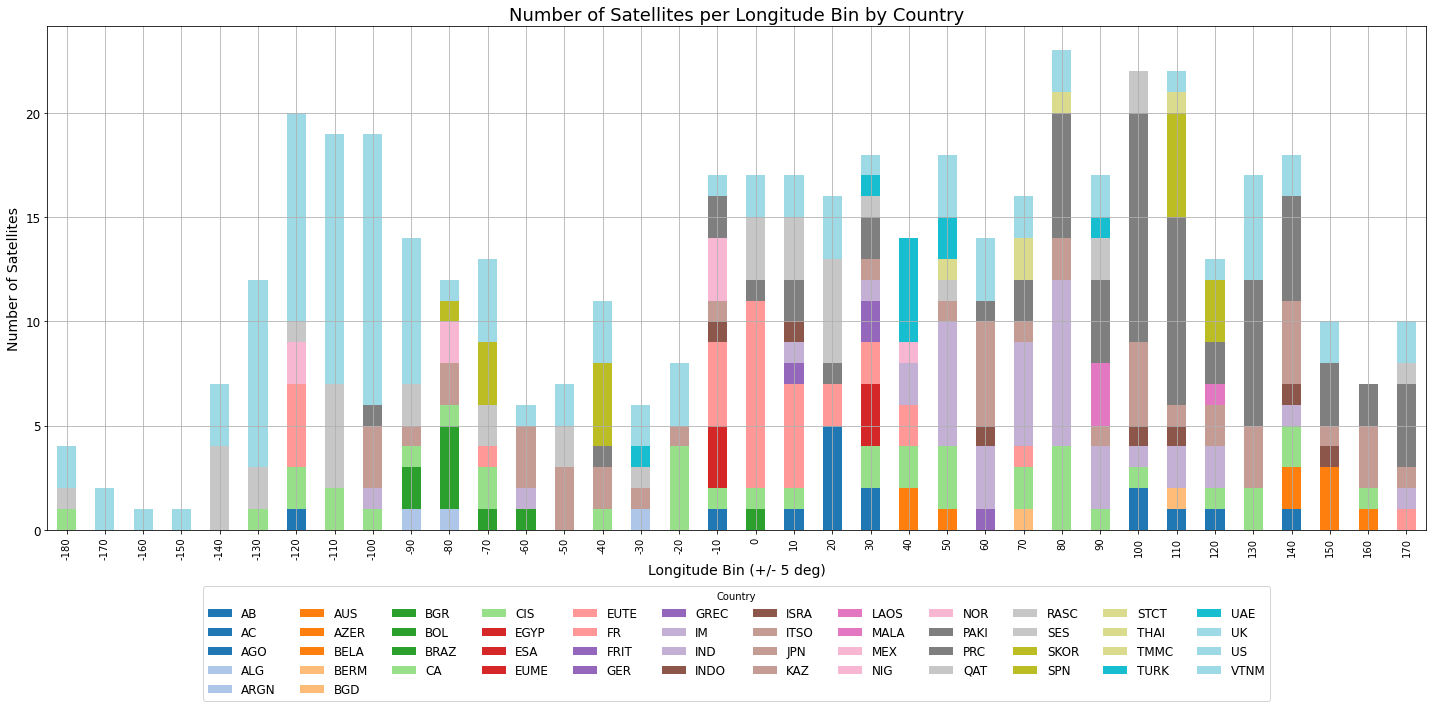

In [75]:

# Create bins for longitude values
bins = np.arange(-180, 181, 10)  # Bins from -180 to 180 degrees, inclusive

# Assign each satellite to a bin
sat_data['LONGITUDE_BIN'] = pd.cut(sat_data['Longitude'], bins, labels=bins[:-1])

# Group by longitude bin and country, then count the number of satellites
longitude_country_counts = sat_data.groupby(['LONGITUDE_BIN', 'COUNTRY']).size().unstack(fill_value=0)

# Plot the stacked bar plot
plt.figure(figsize=(20, 10))

# Plot each country's data as a stacked bar segment
longitude_country_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Number of Satellites per Longitude Bin by Country', fontsize=18)
plt.xlabel('Longitude Bin (+/- 5 deg)', fontsize=14)
plt.ylabel('Number of Satellites', fontsize=14)
plt.legend(title='Country', fontsize=12, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=12)  # Adjust ncol as needed
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('../figures/number_sat_per_longitude_bin_by_country.png', dpi=400)
plt.show()


In [76]:

# bins = np.arange(-180, 181, 40)  # Bins from -180 to 180 degrees, inclusive

# # Assign each satellite to a bin
# sat_data['LONGITUDE_BIN'] = pd.cut(sat_data['Longitude'], bins, labels=bins[:-1])

# # Group by longitude bin and country, then count the number of satellites
# longitude_country_counts = sat_data.groupby(['COUNTRY', 'LONGITUDE_BIN']).size().unstack(fill_value=0)

# # Plot the line plot for each country
# plt.figure(figsize=(20, 10))

# for country in longitude_country_counts.index:
#     plt.plot(bins[:-1], longitude_country_counts.loc[country], label=country)

# plt.title('Number of Satellites per Longitude Bin by Country', fontsize=18)
# plt.xlabel('Longitude Bin', fontsize=14)
# plt.ylabel('Number of Satellites', fontsize=14)
# # plt.legend(title='Country', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper center')
# plt.legend(title='Country', fontsize=12, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=15)  # Adjust ncol as needed
# plt.grid(True)
# plt.tight_layout()
# plt.show()
